# The below command is used to download and fullfill the requirements

In [ ]:
# !pip install sounddevice
# !sudo apt-get install libportaudio2
# from google.colab import drive
# drive.mount('/content/gdrive')
# !unzip '/content/gdrive/MyDrive/sem6/AI ML Lab/Assignment_2/archive.zip'

# Assignment Part 1: Speaker Identification

Tasks 1:
1. Download the dataset from PTDB-TUG Dataset(subset of TIMIT)
Read about the dataset here:
https://www.spsc.tugraz.at/databases-and-tools/ptdb-tug-pitch-tracking-database-from-graz-university-of-technology.html

Please find the below link for download:
https://www.kaggle.com/datasets/lazyrac00n/speech-activity-detection-datasets


2. Look at the structure of the dataset. Total utterances/speech samples present.

3. Create Spectrograms for each utterance and store them.

Task 2:

1. Build a baseline network to perform the speaker identification using CNN
2. Use Regularizers to avoid overfitting of data

In [1]:
import soundfile as sf
import sounddevice as sd
file = 'All_Data/Data/Audio/Male/PTDB-TUG/mic_M01_sa1.wav'
data, fs = sf.read(file,dtype='float32')
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(404160,)


In [2]:
from IPython.display import Audio
Audio(file)

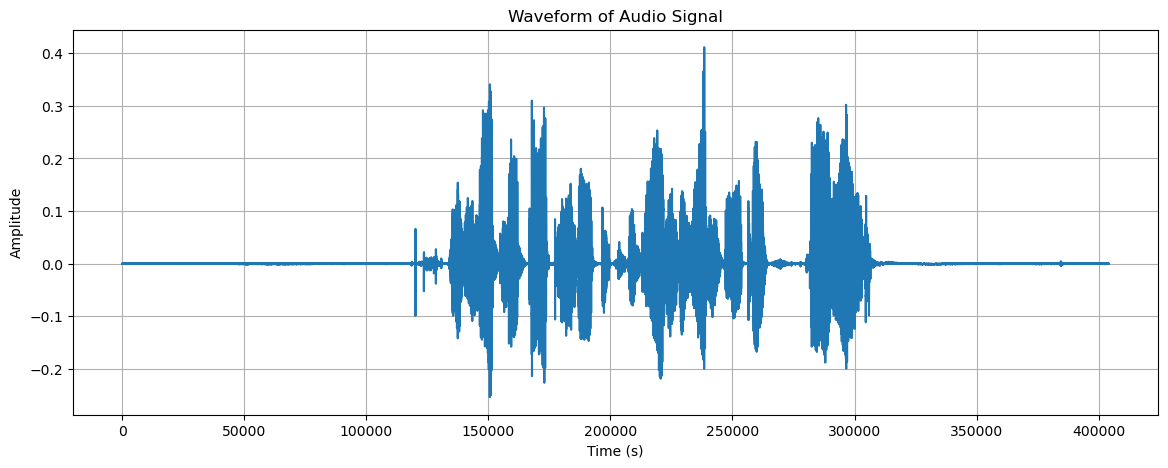

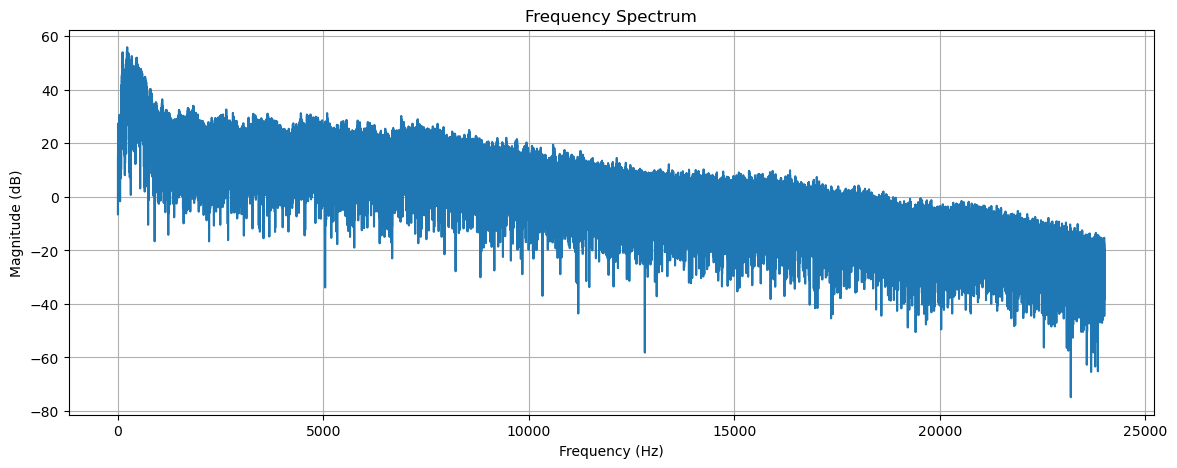

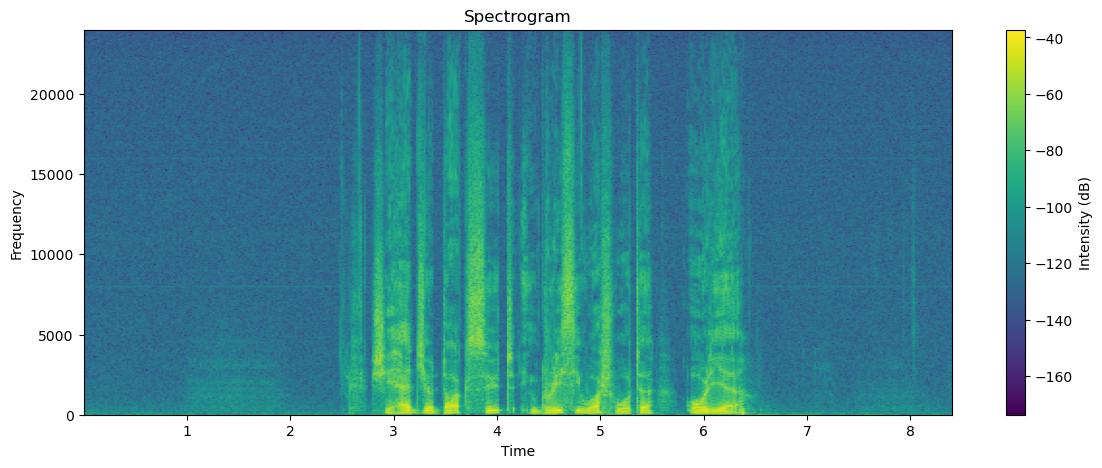

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
# Waveform
plt.figure(figsize=(14, 5))
plt.plot(data)
plt.grid()
plt.title('Waveform of Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# FFT
audio_channel = data if len(data.shape) > 1 else data
fft_result = np.fft.fft(audio_channel)
magnitude = np.abs(fft_result)
frequency = np.linspace(0, fs, len(magnitude))
# Plot the frequency graph
plt.figure(figsize=(14, 5))
plt.plot(frequency[:len(frequency)//2], 20 * np.log10(magnitude[:len(magnitude)//2]))  # Plot half of the spectrum (to avoid mirror effect)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Frequency Spectrum')
plt.grid()
plt.show()

# spectogram
plt.figure(figsize=(14, 5))
plt.specgram(data, Fs=fs, NFFT=1024, cmap='viridis')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectrogram')
plt.colorbar(label='Intensity (dB)')
plt.show()


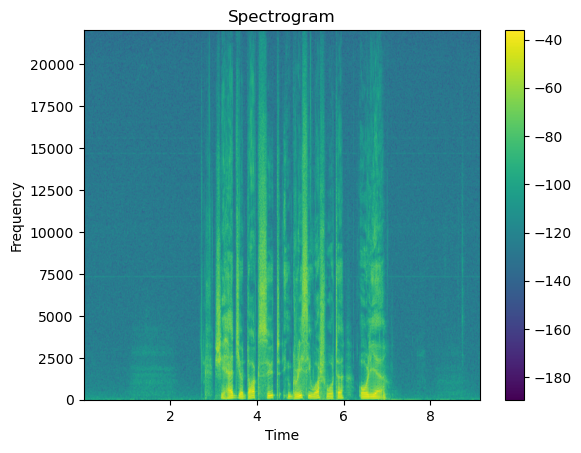

In [4]:
Pxx, freqs, bins, im = plt.specgram(data, NFFT=1024, Fs=44100, noverlap=900)

# Display the spectrogram
plt.colorbar()
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')

# Save the spectrogram as an image
plt.savefig('spectrogram.png')

# Show the plot
plt.show()

In [5]:
import soundfile as sf
from scipy.signal import butter, filtfilt
from IPython.display import Audio

def apply_low_pass_filter(data, sample_rate, cutoff_frequency):
    nyquist_frequency = 0.5 * sample_rate      # nyquist_frequency is genrerally half of sampling rate
    normalized_cutoff = cutoff_frequency / nyquist_frequency
    order = 6  # Filter order
    # Create the low-pass Butterworth filter
    b, a = butter(order, normalized_cutoff, btype='low')   # btype low is lowpass filter
    print(len(b),b,len(a),a)
    # Apply the filter to the data
    filtered_data = filtfilt(b, a, data, axis=0)
    return filtered_data

def apply_high_pass_filter(data, sample_rate, cutoff_frequency):
    nyquist_frequency = 0.5 * sample_rate
    normalized_cutoff = cutoff_frequency / nyquist_frequency
    order = 6

    b, a = butter(order, normalized_cutoff, btype='high')   # btype high is highpass filter
    print(len(b),b,len(a),a)
    filtered_data = filtfilt(b, a, data, axis=0)
    return filtered_data


data, sample_rate = sf.read(file)
print("Original Audio:")
Audio(data, rate=sample_rate)

Original Audio:


In [6]:
cutoff_frequency = 4000
filtered_audio = apply_low_pass_filter(data, sample_rate, cutoff_frequency)
print("low  pass Filtered Audio:")
Audio(filtered_audio, rate=sample_rate)

7 [0.00013259 0.00079556 0.00198889 0.00265186 0.00198889 0.00079556
 0.00013259] 7 [ 1.         -3.98118849  6.84526042 -6.44982892  3.49513865 -1.02925023
  0.12835451]
low  pass Filtered Audio:


In [7]:
cutoff_frequency = 4000
filtered_audio = apply_high_pass_filter(data, sample_rate, cutoff_frequency)
print("high pass filter Audio:")
Audio(filtered_audio, rate=sample_rate)

7 [ 0.35826596 -2.14959574  5.37398935 -7.16531913  5.37398935 -2.14959574
  0.35826596] 7 [ 1.         -3.98118849  6.84526042 -6.44982892  3.49513865 -1.02925023
  0.12835451]
high pass filter Audio:


In [8]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import spectrogram

frequencies, times, spectrogram_values = spectrogram(data, fs=fs)

spectrogram_array = np.array(spectrogram_values)

print("Shape of Spectrogram Array:", spectrogram_array.shape)



Shape of Spectrogram Array: (129, 1804)


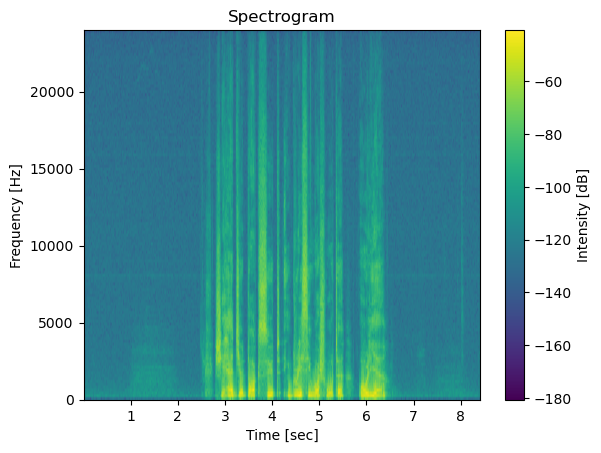

In [9]:
plt.imshow(10 * np.log10(spectrogram_values), aspect='auto', cmap='viridis', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.colorbar(label='Intensity [dB]')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram')
plt.show()


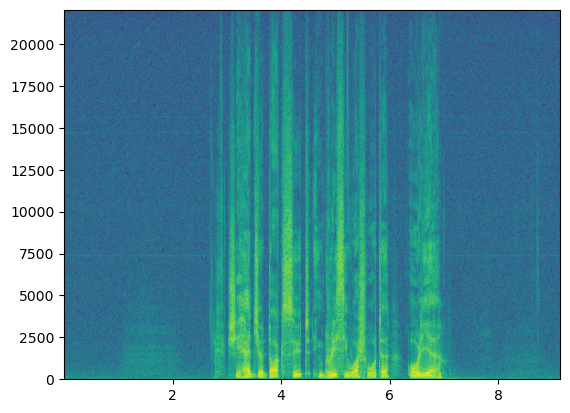

In [19]:
Pxx, freqs, bins, im = plt.specgram(data,NFFT=1024, Fs=44100)